Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
65536
(256, 256)


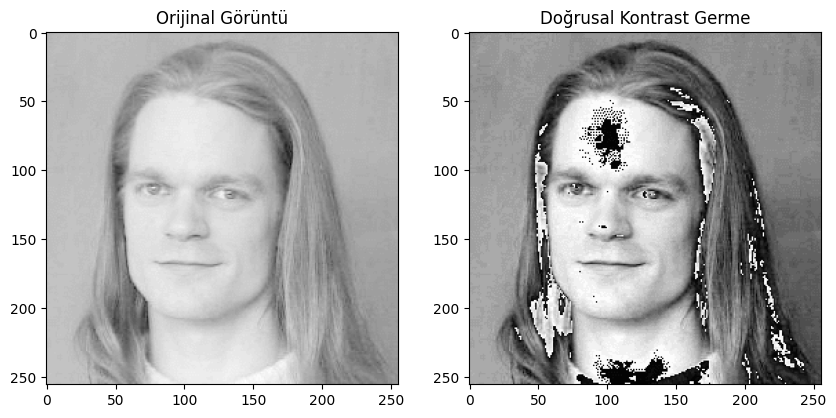

In [39]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

# Google Drive'ı /content/drive altına bağla
drive.mount('/content/drive')

# Görüntüyü yükle
img_path = '/content/drive/MyDrive/GoruntuIsleme/images/low_contrast.png'
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# Görüntü başarıyla yüklenmediyse, uygun bir hata mesajı ver
if img is None:
    print("Görüntü yüklenemedi. Dosya adını ve yolunu kontrol edin.")
else:
    # Doğrusal kontrast germe fonksiyonu
    def linear_contrast_stretching(image, min_out=0, max_out=556):
        min_in, max_in = np.min(image), np.max(image)
        stretched = (((image - min_in) / (max_in - min_in)) * (max_out - min_out)) + min_out

        # image orjinal görüntüdeki tüm piksel değerlini tutan bir matristir.
        #her piksel değerinden min çıkartır sonra bunu imagein max ve min değerine böler sonrasında istenilen aralık ile çarpılır
        # min_out değeri eklenerek çıktı görüntüsünü minimuma taşır.

        return stretched.astype(np.uint8)

    # image hakkındaki bazı bilgiler
    print(img.size)
    print(img.shape)

    # Doğrusal kontrast germe uygula
    img_stretched = linear_contrast_stretching(img)

    # Görüntüleri göster
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Orijinal Görüntü')

    plt.subplot(1, 2, 2)
    plt.imshow(img_stretched, cmap='gray')
    plt.title('Doğrusal Kontrast Germe')

    plt.show()
